## Step 1 import datacube library

In [1]:
import datacube
%matplotlib inline
dc = datacube.Datacube(app = 'my_app', config = '/home/localuser/.datacube.conf') 

## Step 2 list data information

In [2]:
list_of_products = dc.list_products()
netCDF_products = list_of_products[list_of_products['format'] == 'NetCDF']
netCDF_products

,name,description,lon,platform,instrument,format,product_type,time,lat,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
7,ls7_lasrc_taiwan,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,LANDSAT_7,ETM,NetCDF,LEDAPS,None,None,EPSG:4326,"[-0.000270824429276318, 0.000270824429276318]","[0.947885502467113, 0.947885502467113]","(latitude, longitude)"
2,ls7_ledaps_general,Landsat 7 USGS Collection 1 Higher Level SR sc...,None,LANDSAT_7,ETM,NetCDF,LEDAPS,None,None,EPSG:4326,"[-0.000269494585236, 0.000269494585236]","[0.943231048326, 0.943231048326]","(latitude, longitude)"
6,ls8_lasrc_taiwan,Landsat 8 USGS Collection 1 Higher Level SR sc...,None,LANDSAT_8,OLI_TIRS,NetCDF,LaSRC,None,None,EPSG:4326,"[-0.000270824429276318, 0.000270824429276318]","[0.947885502467113, 0.947885502467113]","(latitude, longitude)"
8,s1_gamma0a_taiwan,"Sentinel-1A/B SAR Gamma0, processed to the CEO...",None,SENTINEL_1,SAR,NetCDF,gamma0,None,None,EPSG:4326,"[-9.02748097587726e-05, 9.02748097587726e-05]","[0.315961835, 0.315961835]","(latitude, longitude)"
4,s1_gamma0_taiwan,"Sentinel-1A/B SAR Gamma0, processed to the CEO...",None,SENTINEL_1,SAR,NetCDF,gamma0,None,None,EPSG:4326,"[-9.02748097587726e-05, 9.02748097587726e-05]","[0.315961834155704, 0.315961834155704]","(latitude, longitude)"
12,UAV_albers,"Landsat 5 LEDAPS 25 metre, 100km tile, Austral...",None,None,None,NetCDF,UAV_type,None,None,EPSG:3826,"[-30, 30]","[100000.0, 100000.0]","(y, x)"


In [3]:
list_of_measurements = dc.list_measurements()
list_of_measurements

aliases  \
product                  measurement                                                  
formosa2_Test            pancromatic                                          [Pan]   
formosa2_Test2           pancromatic                                          [Pan]   
ls5_level1_usgs          blue                                        [band_1, blue]   
                         green                                      [band_2, green]   
                         red                                          [band_3, red]   
                         nir                                          [band_4, nir]   
                         swir1                                      [band_5, swir1]   
                         swir2                                      [band_7, swir2]   
                         quality                                 [QUALITY, quality]   
ls5_usgs_sr_scene        blue                                    [band_1, sr_band1]   
                         green                                   [band_2, sr_band2]   
                         red                                     [band_3, sr_band3]   
                         nir                                     [band_4, sr_band4]   
                         swir1                                   [band_5, sr_band5]   
                         swir2                                   [band_7, sr_band7]   
                         lwir                                    [band_6, bt_band6]   
                         pixel_qa                                        [pixel_qa]   
ls7_collections_sr_scene sr_band1                                    [band_1, blue]   
                         sr_band2                                   [band_2, green]   
                         sr_band3                                     [band_3, red]   
                         sr_band4                                     [band_4, nir]   
                         sr_band5                                   [band_5, swir1]   
                         sr_band7                                   [band_7, swir2]   
                         sr_atmos_opacity                                [atmos_op]   
                         pixel_qa                                        [pixel_qa]   
                         radsat_qa                                      [radsat_qa]   
                         sr_cloud_qa                                     [cloud_qa]   
                         solar_azimuth_band4                  [solar_azimuth_band4]   
                         solar_zenith_band4                    [solar_zenith_band4]   
                         sensor_azimuth_band4                [sensor_azimuth_band4]   
...                                                                             ...   
ls8_level1_usgs          cirrus                                    [band_9, cirrus]   
                         lwir1                                     [band_10, lwir1]   
                         lwir2                                     [band_11, lwir2]   
                         quality                                 [QUALITY, quality]   
ls8_usgs_sr_scene        coastal_aerosol                         [band_1, sr_band1]   
                         blue                                    [band_2, sr_band2]   
                         green                                   [band_3, sr_band3]   
                         red                                     [band_4, sr_band4]   
                         nir                                     [band_5, sr_band5]   
                         swir1                                   [band_6, sr_band6]   
                         swir2                                   [band_7, sr_band7]   
                         lwir1                                 [band_10, bt_band10]   
                         lwir2                                 [band_11, bt_band11]   
                         pixel_qa                                        [

## Step 3 loading data

In [4]:
desired_bands = ['red','green','blue','nir','swir1','swir2','pixel_qa']  

In [33]:
import datetime
date_range =(datetime.datetime(2015,1,1), 
datetime.datetime(2015,12,31))

lon = (120.972549, 122.011577)
lat = (24.583987, 25.307047)
# 目前設為整個台北市

platform = 'LANDSAT_8' 

product = 'ls8_lasrc_taiwan'

desired_bands = ['red','green','blue','nir','swir1','swir2','pixel_qa']  

data = dc.load(product = product,platform = platform,
lat = lat,lon = lon,time = date_range, 
measurements = desired_bands, group_by='solar_day')
data
#可能會需要一些時間來load資料

<xarray.Dataset>
Dimensions:    (latitude: 2671, longitude: 3837, time: 45)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-07T02:27:03 2015-01-16T02:20:50 ...
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 25.31 25.31 25.31 ...
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 121.0 121.0 121.0 ...
Data variables:
    red        (time, latitude, longitude) int16 -9999 -9999 -9999 -9999 ...
    green      (time, latitude, longitude) int16 -9999 -9999 -9999 -9999 ...
    blue       (time, latitude, longitude) int16 -9999 -9999 -9999 -9999 ...
    nir        (time, latitude, longitude) int16 -9999 -9999 -9999 -9999 ...
    swir1      (time, latitude, longitude) int16 -9999 -9999 -9999 -9999 ...
    swir2      (time, latitude, longitude) int16 -9999 -9999 -9999 -9999 ...
    pixel_qa   (time, latitude, longitude) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    crs:      EPSG:4326

## Step 4 showing what data look like

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
cloud_free_green = data.green.where(data.green > 0).where(data.pixel_qa == 322)
#cloud_free.plot(col='time', col_wrap=3)
cloud_free_red = data.red.where(data.red > 0).where(data.pixel_qa == 322)
cloud_free_blue = data.blue.where(data.blue > 0).where(data.pixel_qa == 322)
cloud_free_nir = data.nir.where(data.nir > 0).where(data.pixel_qa == 322)
cloud_free_swir1 = data.swir1.where(data.swir1 > 0).where(data.pixel_qa == 322)
cloud_free_swir2 = data.swir2.where(data.swir2 > 0).where(data.pixel_qa == 322)

## Step 5 use median to stack image

In [35]:
combine_green = cloud_free_green.median(dim='time')
combine_red = cloud_free_red.median(dim='time')
combine_blue = cloud_free_blue.median(dim='time')
combine_nir = cloud_free_nir.median(dim='time')
combine_swir1 = cloud_free_swir1.median(dim='time')
combine_swir2 = cloud_free_swir2.median(dim='time')

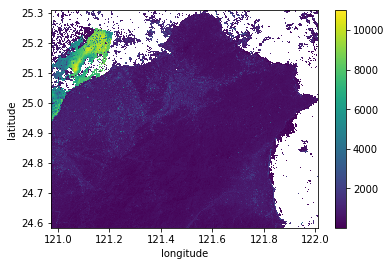

In [36]:
combine_green.plot()

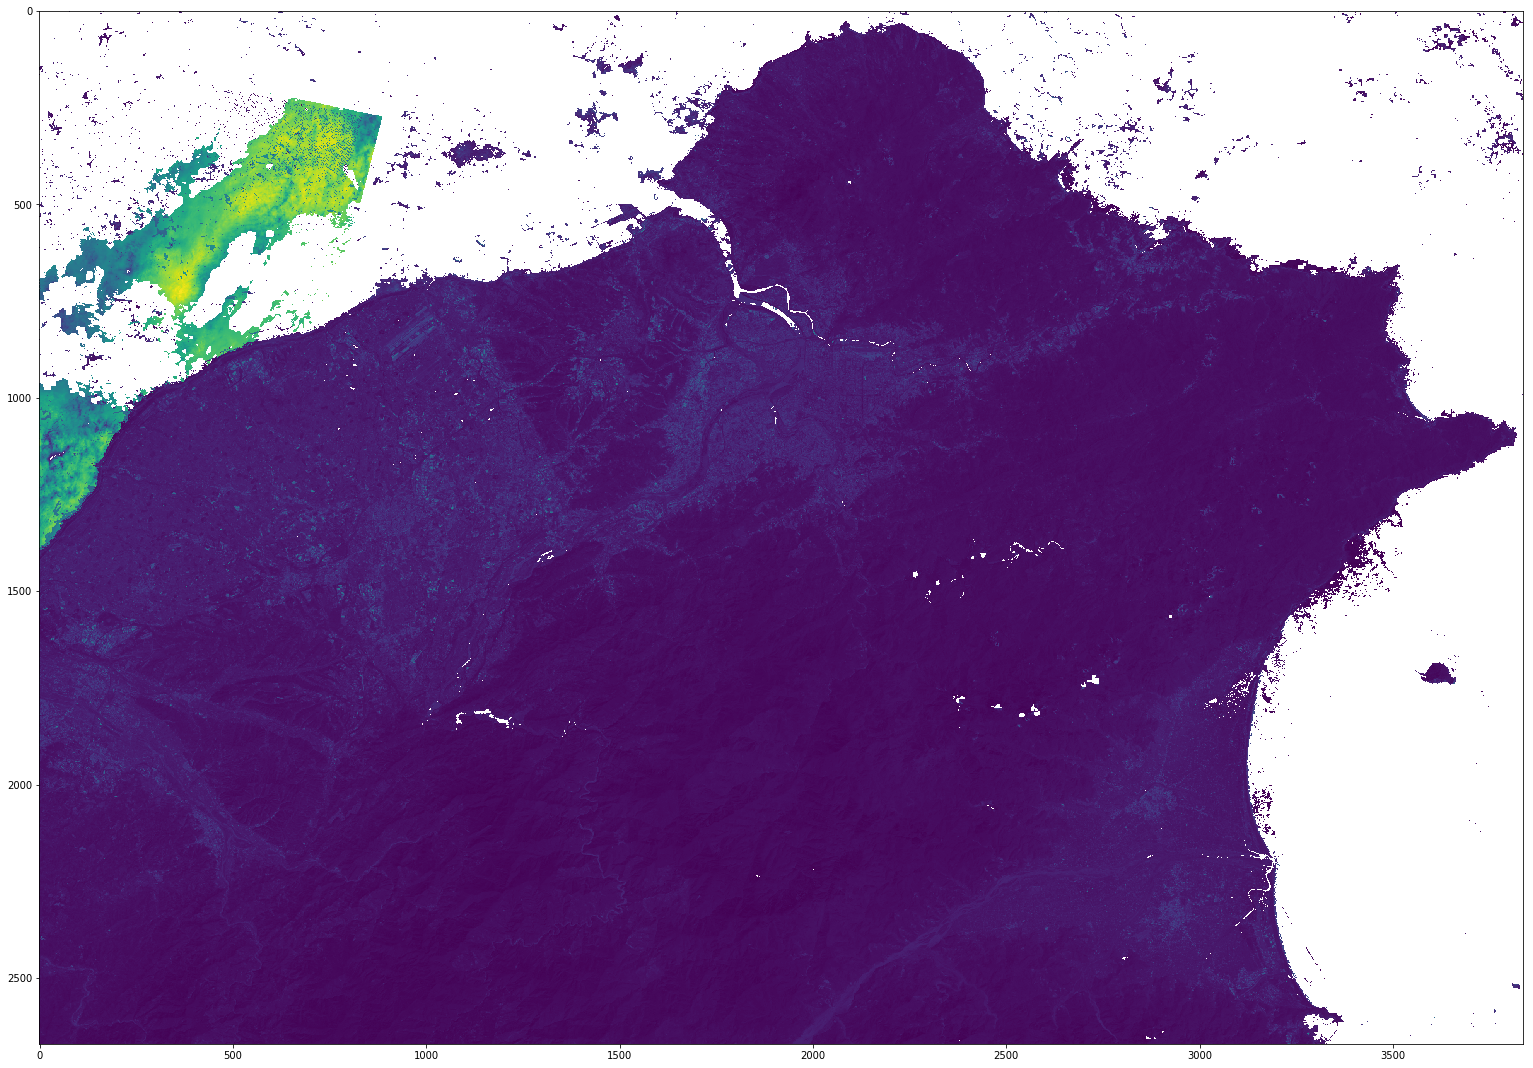

In [37]:
max_val = combine_green.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (combine_green / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

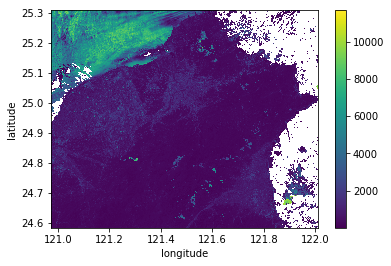

In [9]:
combine_red.plot()

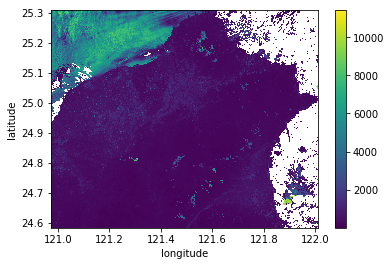

In [10]:
combine_blue.plot()

### Step 5-1 automatic combine

In [11]:
data.red

<xarray.DataArray 'red' (time: 44, latitude: 2671, longitude: 3837)>
array([[[ 7906,  7872, ...,  8577,  8667],
        [ 7919,  7886, ...,  8522,  8615],
        ...,
        [ 9030,  8869, ...,  8632,  8564],
        [ 9237,  9037, ...,  8750,  8605]],

       [[-9999, -9999, ..., -9999, -9999],
        [-9999, -9999, ..., -9999, -9999],
        ...,
        [ 3631,  3625, ..., -9999, -9999],
        [ 3631,  3606, ..., -9999, -9999]],

       ...,

       [[ 1529,  1140, ...,  -108,   -88],
        [ 1671,   955, ...,   -36,   -13],
        ...,
        [ 1101,   730, ...,   -10,   -28],
        [ 1195,   871, ...,   -27,   -21]],

       [[-9999, -9999, ..., -9999, -9999],
        [-9999, -9999, ..., -9999, -9999],
        ...,
        [ 9152,  9098, ..., -9999, -9999],
        [ 9167,  9111, ..., -9999, -9999]]], dtype=int16)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-03T02:20:54 2016-01-10T02:27:04 ...
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 25.31

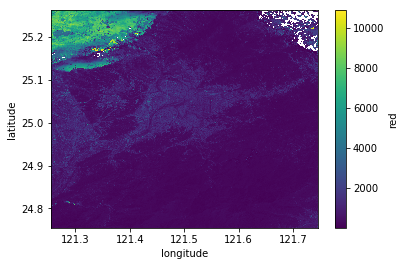

In [80]:
data.get(['red']).where(data.get(['red']) > 0).where(data.pixel_qa == 322).median(dim='time').red.plot() #用.get可以稍微取代.varibales
#https://github.com/pydata/xarray/issues/1801

In [82]:
data.get(['red']).to_array('red') #格式會是錯的

<xarray.DataArray (red: 1, time: 92, latitude: 1875, longitude: 1817)>
array([[[[6978, ...,  -33],
         ...,
         [ 321, ...,  971]],

        ...,

        [[9032, ..., 8448],
         ...,
         [4683, ..., 6957]]]], dtype=int16)
Coordinates:
  * latitude   (latitude) float64 25.26 25.26 25.26 25.26 25.26 25.26 25.26 ...
  * longitude  (longitude) float64 121.3 121.3 121.3 121.3 121.3 121.3 121.3 ...
  * time       (time) datetime64[ns] 2013-04-16T02:22:38 2013-05-02T02:22:36 ...
  * red        (red) <U3 'red'
Attributes:
    crs:      EPSG:4326

In [81]:
import xarray as xr
test = xr.Dataset({})
for band in desired_bands:
    if band != 'pixel_qa':
        temp1 = data.get([band]).where(data.get([band]) > 0).where(data.pixel_qa == 322).median(dim='time')
        test = test.merge(temp1)
test

<xarray.Dataset>
Dimensions:    (latitude: 1875, longitude: 1817)
Coordinates:
  * latitude   (latitude) float64 25.26 25.26 25.26 25.26 25.26 25.26 25.26 ...
  * longitude  (longitude) float64 121.3 121.3 121.3 121.3 121.3 121.3 121.3 ...
Data variables:
    red        (latitude, longitude) float64 4.127e+03 2.398e+03 2.396e+03 ...
    green      (latitude, longitude) float64 3.904e+03 2.39e+03 2.355e+03 ...
    blue       (latitude, longitude) float64 4.088e+03 2.432e+03 2.498e+03 ...
    nir        (latitude, longitude) float64 4.232e+03 2.452e+03 2.474e+03 ...
    swir1      (latitude, longitude) float64 3.218e+03 2.214e+03 2.04e+03 ...
    swir2      (latitude, longitude) float64 2.537e+03 1.788e+03 1.657e+03 ...

In [116]:
from utils.dc_utilities import write_geotiff_from_xr, write_png_from_xr

measurements = desired_bands.copy()
measurements.remove('pixel_qa')
measurements
write_geotiff_from_xr("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/taipei_cloud_remove_new.tiff", test, measurements, nodata=0, crs="EPSG:4326")

## Step 6 combine each band into one Dataset

In [38]:
combine = combine_green.to_dataset(name = "green")

In [39]:
combine

<xarray.Dataset>
Dimensions:    (latitude: 2671, longitude: 3837)
Coordinates:
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 25.31 25.31 25.31 ...
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 121.0 121.0 121.0 ...
Data variables:
    green      (latitude, longitude) float64 nan nan nan nan nan nan nan nan ...

In [40]:
combine = combine.merge(combine_red.to_dataset(name = "red"))

In [41]:
combine = combine.merge(combine_blue.to_dataset(name = "blue"))

In [42]:
combine

<xarray.Dataset>
Dimensions:    (latitude: 2671, longitude: 3837)
Coordinates:
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 25.31 25.31 25.31 ...
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 121.0 121.0 121.0 ...
Data variables:
    green      (latitude, longitude) float64 nan nan nan nan nan nan nan nan ...
    red        (latitude, longitude) float64 nan nan nan nan nan nan nan nan ...
    blue       (latitude, longitude) float64 nan nan nan nan nan nan nan nan ...

## Step 7 print out image

In [43]:
rbg = combine.to_array(dim='color').transpose('latitude', 'longitude', 'color')

In [47]:
fake_saturation = 3000
# 這個是用來當作影像值得上限，超過就用3000取代
clipped_visible = rbg.where(rbg < fake_saturation).fillna(fake_saturation)
# 上面這邊就是這樣做，透過fillna()函式可以填入值
max_val = clipped_visible.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (clipped_visible / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')
# 最後就印出來，記得要import該import的東西

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray-0.9.6-py3.5.egg/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less
  if not reflexive


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [31]:
from utils.dc_utilities import write_geotiff_from_xr, write_png_from_xr
measurements = ['green','red','blue']
write_geotiff_from_xr("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2014-2013_color-only.tiff", combine, measurements, nodata=0, crs="EPSG:4326")

In [45]:
#這個製出的圖顏色會怪怪的
write_png_from_xr("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015taipei_cloud_remove.png", combine, ['green','red','blue'], scale=[[255,0], [255,0], [255,0]])

In [49]:
#替代方案，用matplotlib製成png檔案
plt.imsave("/home/localuser/Datacube/data_cube_notebooks/NTUF_Hsing-Yu/2015taipei_cloud_remove2.png", scaled)